In [1]:
#ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
import re

In [23]:
#ローパスフィルタ
def lowpass(dat):
    #  それぞれの変数は下記のとおりとする
    #  float samplerate … サンプリング周波数
    #  float freq … カットオフ周波数
    #  float q    … フィルタのQ値
    samplerate = 1000
    freq = 5
    q = 1/np.sqrt(2)
    omega = 2.0 * 3.14159265 * freq/samplerate;
    alpha = np.sin(omega) / (2.0 * q);
 
    a0 =  1.0 + alpha;
    a1 = -2.0 * np.cos(omega);
    a2 =  1.0 - alpha;
    b0 = (1.0 - np.cos(omega)) / 2.0;
    b1 =  1.0 - np.cos(omega);
    b2 = (1.0 - np.cos(omega)) / 2.0;
    Out_1 = 0
    Out_2 = 0
    Output_list = []
    Output_list.append(dat[0])
    Output_list.append(dat[1])
    for num in range(2,len(dat)):
        inData = dat[num]
        inData_1 = dat[num - 1]
        inData_2 = dat[num - 2]
        Out = b0/a0 * inData + b1/a0 * inData_1  + b2/a0 * inData_2 - a1/a0 * Out_1 - a2/a0 * Out_2;
        Output_list.append(Out)
        Out_2 = Out_1
        Out_1 = Out
    Output_list = Output_list[150:]
    return np.array(Output_list)

#速度と加速度を出す
def velocity_acc(dat):
    velocityOut_list = []
    accOut_list = []
    velocityOut_list.append(0)
    accOut_list.append(0)
    accOut_list.append(0)
    for num in range(1,len(dat)):
        velocity = abs(dat[num] - dat[num-1]) / 0.001
        velocityOut_list.append(velocity)
    for num in range(2, len(velocityOut_list)):
        acc = abs(velocityOut_list[num] - velocityOut_list[num-1]) / 0.001
        accOut_list.append(acc)
    return np.array(velocityOut_list), np.array(accOut_list)

#軌跡長
def trajectory_len(dat):
    length = 0
    normalizedDat = dat - dat[0]
    for num in range(1,len(dat)):
        length = length + abs(normalizedDat[num] - normalizedDat[num-1])
    return length

Mean: 0.015973264241824655


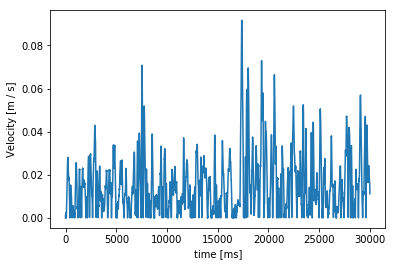

In [22]:
dat = pd.read_csv("Results/Lowpass filtered/set zero/Sub1/Filtered_190129_104459_s1_pre1.csv")
vel, acc = velocity_acc(dat["L Px(Lowpass)[m]"])
plt.plot(np.arange(len(vel)), vel)
plt.xlabel("time [ms]")
plt.ylabel("Velocity [m / s]")
print("Mean:", vel.mean())

In [24]:
Px = dat["L Px [m]"]
Py = dat["L Py [m]"]
#ローパスかける
filteredPx = lowpass(Px)
filteredPy = lowpass(Py)
#速度，加速度
Px_v, Px_a = velocity_acc(filteredPx)
Py_v, Py_a = velocity_acc(filteredPy)
#軌跡長
Px_l = trajectory_len(filteredPx)
Py_l = trajectory_len(filteredPy)

In [35]:
Px_v.mean()

0.00053758067864070316

In [24]:
Subject_list = [1,2,3,4,5,6,7]
folderPath = "Data/"
for sub in Subject_list:
    folderPath = "Data/Sub" + str(sub) + "/"
    files = os.listdir(folderPath)
    Px_rms = []
    Py_rms = []
    Px_v_mean = []
    Py_v_mean = []
    Px_v_std = []
    Py_v_std = []
    Px_v_rms = []
    Py_v_rms = []
    Px_v_peak = []
    Py_v_peak = []
    Px_v_peak_n = []
    Py_v_peak_n = []
    Px_a_mean = []
    Py_a_mean = []
    Px_a_std = []
    Py_a_std = []
    Px_a_peak = []
    Py_a_peak = []
    Px_a_peak_n = []
    Py_a_peak_n = []
    Px_a_rms = []
    Py_a_rms = []
    Px_lengths = []
    Py_lengths = []
    for file in files:
        dat_df = pd.read_csv(folderPath + file)
        dat_df = dat_df[:30501]
        #解析する
        Px = dat_df["L Px [m]"]
        Py = dat_df["L Py [m]"]
        #ローパスかける
        filteredPx = lowpass(Px)
        filteredPy = lowpass(Py)
        #速度，加速度
        Px_v, Px_a = velocity_acc(filteredPx)
        Py_v, Py_a = velocity_acc(filteredPy)
        #軌跡長
        Px_l = trajectory_len(filteredPx)
        Py_l = trajectory_len(filteredPy)
        #RMSを計算して格納
        Px_rms.append(np.sqrt(np.power(filteredPx,2).mean()))
        Py_rms.append(np.sqrt(np.power(filteredPy,2).mean()))
        Px_v_rms.append(np.sqrt(np.power(Px_v,2).mean()))
        Py_v_rms.append(np.sqrt(np.power(Py_v,2).mean()))
        Px_a_rms.append(np.sqrt(np.power(Px_a,2).mean()))
        Py_a_rms.append(np.sqrt(np.power(Py_a,2).mean()))
        #結果を格納
        Px_v_mean.append(Px_v.mean())
        Py_v_mean.append(Py_v.mean())
        Px_v_std.append(np.std(Px_v, ddof=1))
        Py_v_std.append(np.std(Py_v, ddof=1))
        Px_v_peak.append(np.max(Px_v))
        Py_v_peak.append(np.max(Py_v))
        Px_v_peak_n.append(np.min(Px_v))
        Py_v_peak_n.append(np.min(Py_v))
        Px_a_mean.append(Px_a.mean())
        Py_a_mean.append(Py_a.mean())
        Px_a_std.append(np.std(Px_a, ddof=1))
        Py_a_std.append(np.std(Py_a, ddof=1))
        Px_a_peak.append(np.max(Px_a))
        Py_a_peak.append(np.max(Py_a))
        Px_a_peak_n.append(np.min(Px_a))
        Py_a_peak_n.append(np.min(Py_a))
        Px_lengths.append(Px_l)
        Py_lengths.append(Py_l)
    #出力データをデータフレームとして作成
    output_df = pd.DataFrame({"Px_length" : Px_lengths,
                              "Px_rms" : Px_rms,
                              "Px_v_mean" : Px_v_mean,
                              "Px_v_std" : Px_v_std,
                              "Px_v_peak" : Px_v_peak,
                              "Px_v_peak_n" : Px_v_peak_n,
                              "Px_v_rms" : Px_v_rms,
                              "Px_a_mean" : Px_a_mean,
                              "Px_a_std" : Px_a_std,
                              "Px_a_peak" : Px_a_peak,
                              "Px_a_peak_n" : Px_a_peak_n,
                              "Px_a_rms" : Px_a_rms,
                              "Py_length" : Py_lengths,
                              "Py_rms" : Py_rms,
                              "Py_v_mean" : Py_v_mean,
                              "Py_v_std" : Py_v_std,
                              "Py_v_peak" : Py_v_peak,
                              "Py_v_peak_n" : Py_v_peak_n,
                              "Py_v_rms" : Py_v_rms,
                              "Py_a_mean" : Py_a_mean,
                              "Py_a_std" : Py_a_std,
                              "Py_a_peak" : Py_a_peak,
                              "Py_a_peak_n" : Py_a_peak_n,
                              "Py_a_rms" : Py_a_rms
                              },
                            columns =["Px_length", "Px_rms", "Px_v_mean", "Px_v_std", "Px_v_peak", "Px_v_peak_n", 
                                      "Px_v_rms", "Px_a_mean", "Px_a_std", "Px_a_peak", "Px_a_peak_n", "Px_a_rms", 
                                     "Py_length", "Py_rms", "Py_v_mean", "Py_v_std", "Py_v_peak", "Py_v_peak_n",
                                     "Py_v_rms", "Py_a_mean", "Py_a_std", "Py_a_peak", "Py_a_peak_n", "Py_a_rms"],
                            index = files)
    output_df.to_csv("Results0205/Sub" + str(sub) + ".csv")

In [22]:
#フィルターがけしたやつを出力
#Subject_list = [1,2,3,4,5,6,7]
Subject_list = [1]
Output_dir = {1:"pre1", 2:"pre2", 3:"pgm1", 4:"pgm2", 5:"pgm3", 6:"pgm4", 7:"pgm5", 8:"post1", 9:"post2"}
folderPath = "Data/"
for sub in Subject_list:
    folderPath = "Data/Sub" + str(sub) + "/"
    files = os.listdir(folderPath)
    for num, file in enumerate(files):
        dat_df = pd.read_csv(folderPath + file)
        dat_df = dat_df[:30150]
        #解析する
        Px = dat_df["L Px [m]"]
        Py = dat_df["L Py [m]"]
#         Px = Px - Px[0]
#         Py = Py - Py[0]
        #ローパスかける
        filteredPx = lowpass(Px)
        filteredPy = lowpass(Py)
        print("Sub" + str(sub), Output_dir[num+1],":",len(filteredPx))
        
        output_df = pd.DataFrame({"L Px(Lowpass)[m]" : filteredPx,
                                 "L Py(Lowpass)[m]" : filteredPy})
        output_df.to_csv("Results/Lowpass filtered/original/Sub" + str(sub) + "/" + "Filtered_" + file)

Sub1 pre1 : 30000
Sub1 pre2 : 30000
Sub1 pgm1 : 30000
Sub1 pgm2 : 30000
Sub1 pgm3 : 30000
Sub1 pgm4 : 30000
Sub1 pgm5 : 30000
Sub1 post1 : 30000
Sub1 post2 : 30000


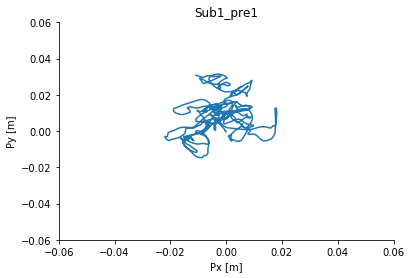

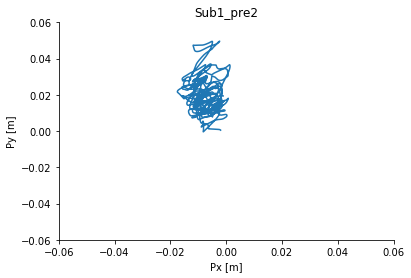

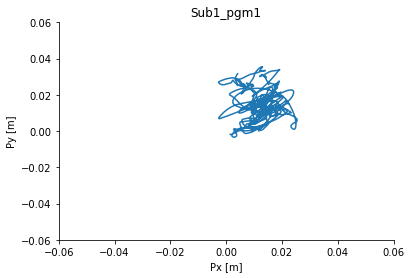

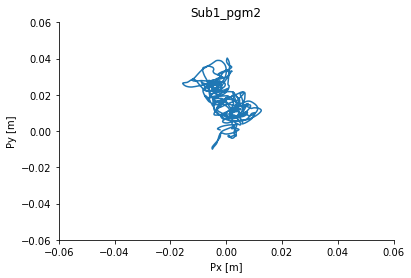

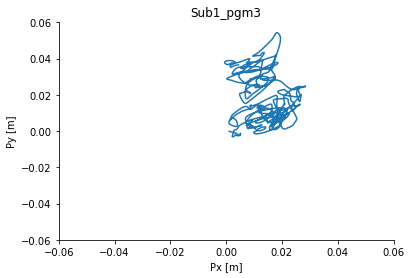

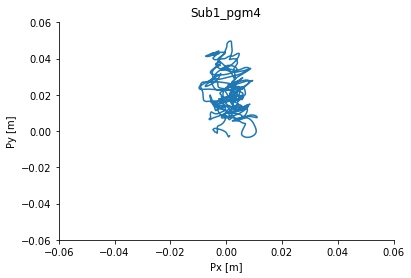

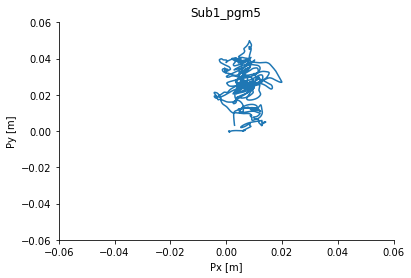

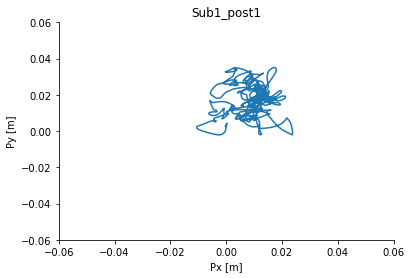

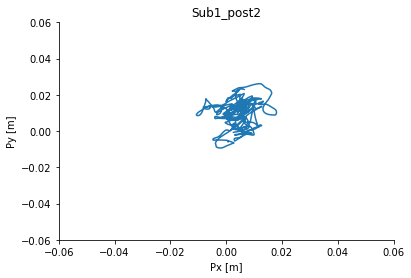

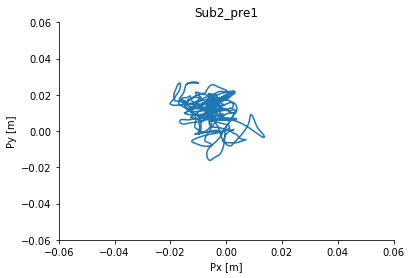

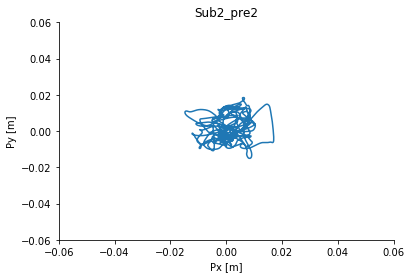

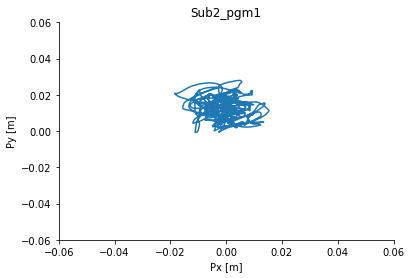

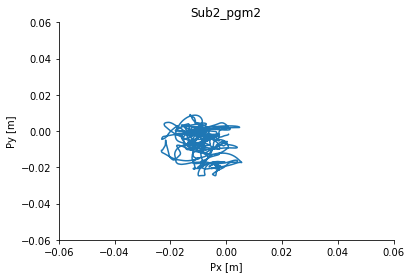

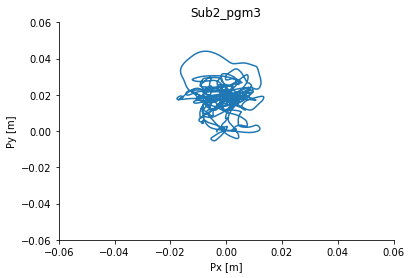

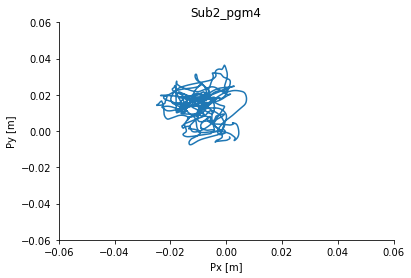

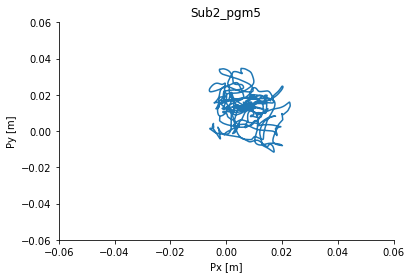

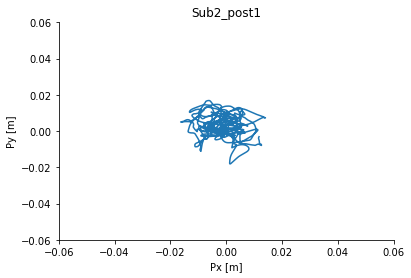

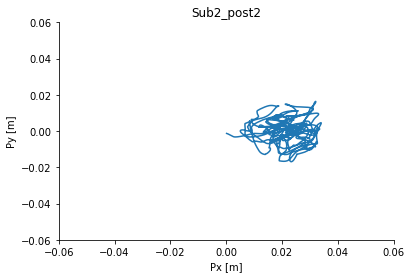

In [3]:
#軌跡のグラフ出力
Subject_list = [1,2]
Output_dir = {1:"pre1", 2:"pre2", 3:"pgm1", 4:"pgm2", 5:"pgm3", 6:"pgm4", 7:"pgm5", 8:"post1", 9:"post2"}
folderPath = "Results/Lowpass filtered/set zero/Sub"
for sub in Subject_list:
    filePath = folderPath + str(sub) + "/"
    files = os.listdir(filePath)
    for num,file in enumerate(files):
        dat = pd.read_csv(filePath + file)
        dat.set_index("Unnamed: 0", inplace = True)
        plt.figure()
        plt.xlim(-0.06,0.06)
        plt.ylim(-0.06,0.06)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel("Px [m]")
        plt.ylabel("Py [m]")
        plt.title("Sub" + str(sub) + "_" + Output_dir[num + 1])
        plt.plot(dat["L Px(Lowpass)[m]"], dat["L Py(Lowpass)[m]"])
        plt.savefig("Results/Figure/Sub" + str(sub) + "/" + "s" + str(sub) + Output_dir[num + 1] + ".jpg")

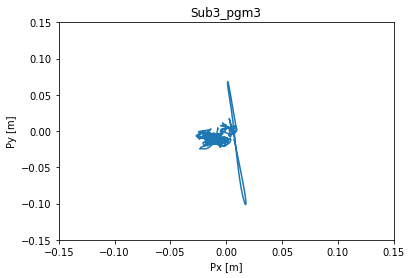

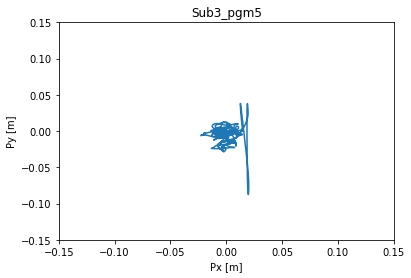

In [13]:
#Sub3_pgm3,pgm5用
Output_dir = {1:"pgm3", 2:"pgm5"}
folderPath = "Results/Lowpass filtered/set zero/Sub"
filePath = folderPath + str(3) + "/"
files = os.listdir(folderPath + str(3))
files = [files[4], files[6]]
for num,file in enumerate(files):
    dat = pd.read_csv(filePath + file)
    dat.set_index("Unnamed: 0", inplace = True)
    plt.figure()
#     plt.locator_params(axis='y',nbins=10)#y軸，6個以内．
    plt.xlim(-0.15,0.15)
    plt.ylim(-0.15,0.15)
    plt.xlabel("Px [m]")
    plt.ylabel("Py [m]")
    plt.title("Sub3_" + Output_dir[num + 1])
    plt.plot(dat["L Px(Lowpass)[m]"], dat["L Py(Lowpass)[m]"])
    plt.savefig("Results/Figure/withAxis/Sub3/s3" + "_" + Output_dir[num + 1] + ".jpg")

In [4]:
files

['Filtered_190129_121329_s3_pre1.csv',
 'Filtered_190129_121431_s3_pre2.csv',
 'Filtered_190129_122157_s3_pgm1.csv',
 'Filtered_190129_122256_s3_pgm2.csv',
 'Filtered_190129_122409_s3_pgm3.csv',
 'Filtered_190129_122516_s3_pgm4.csv',
 'Filtered_190129_122611_s3_pgm5.csv',
 'Filtered_190129_122957_s3_post1.csv',
 'Filtered_190129_123046_s3_post2.csv']

C:\Users\Yusuke\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


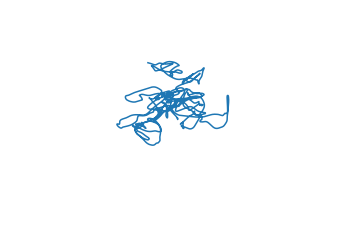

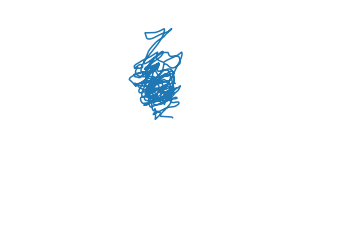

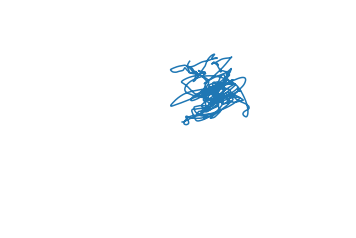

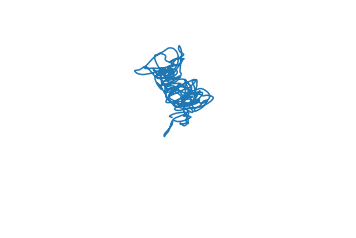

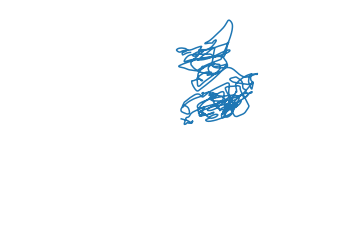

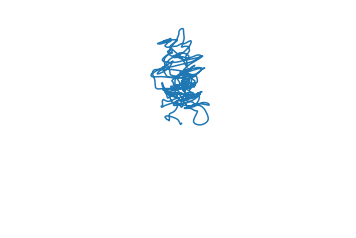

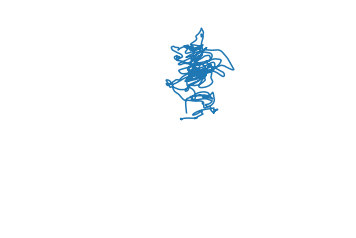

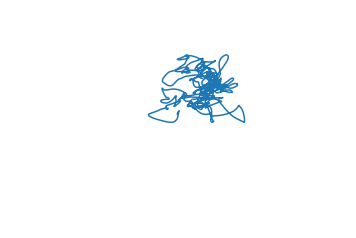

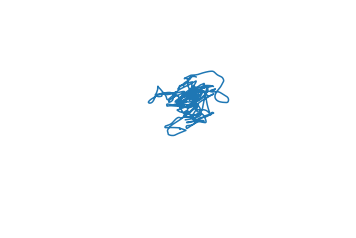

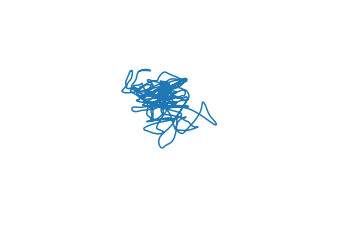

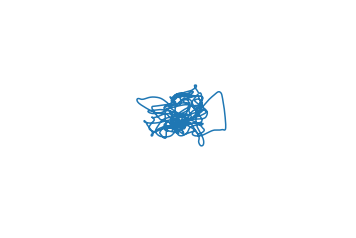

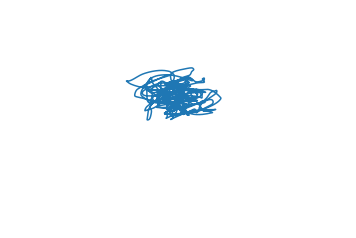

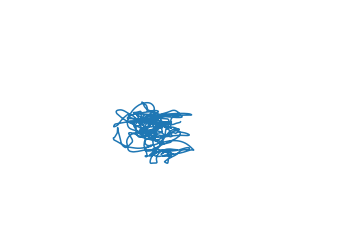

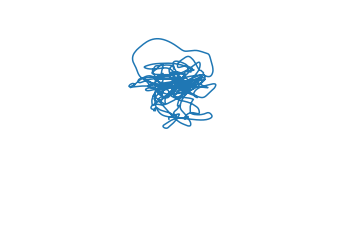

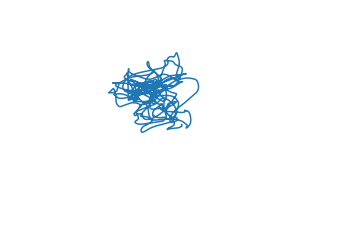

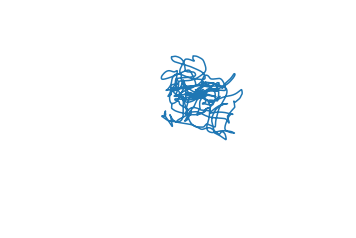

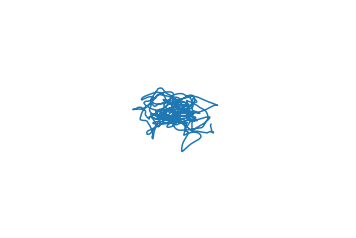

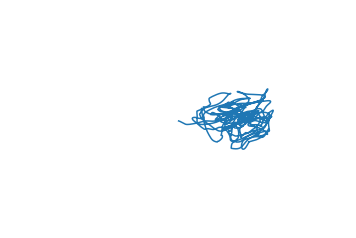

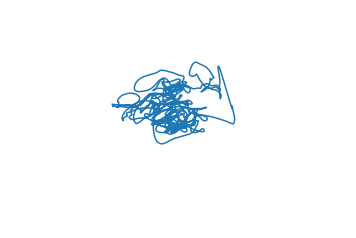

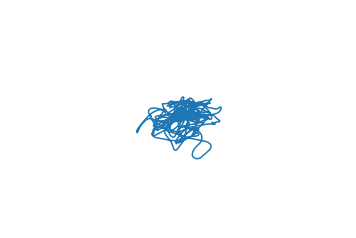

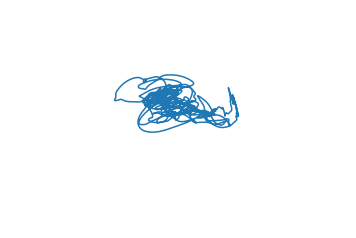

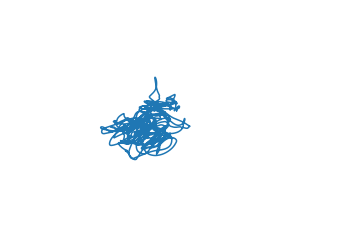

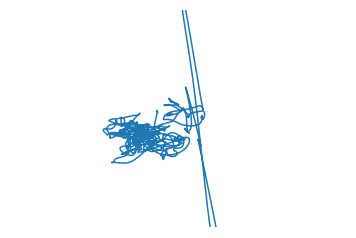

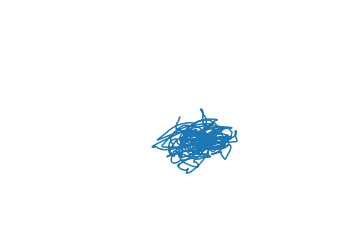

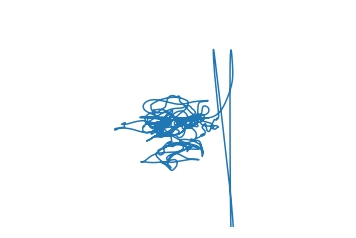

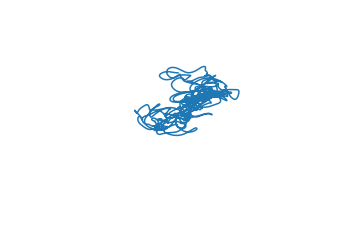

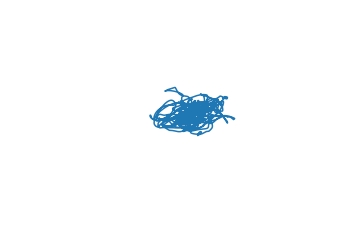

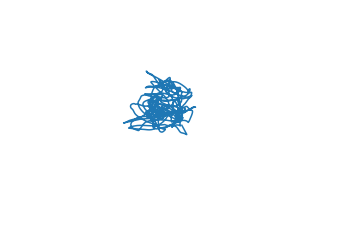

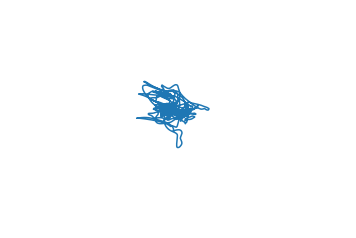

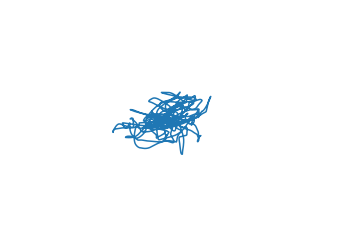

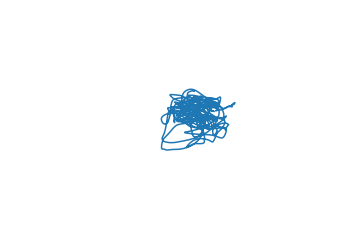

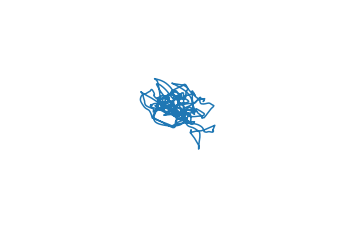

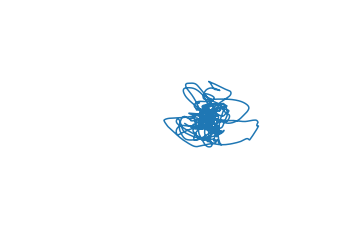

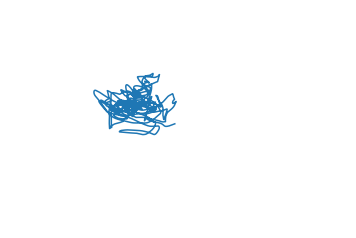

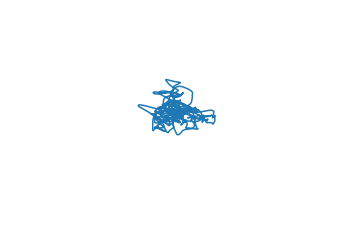

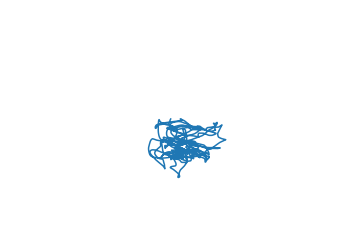

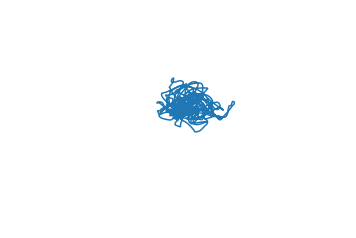

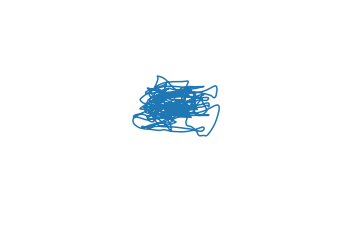

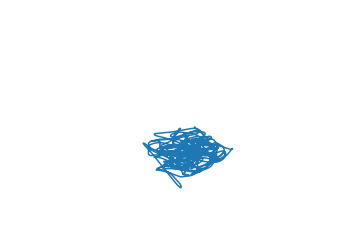

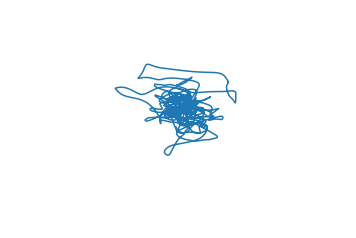

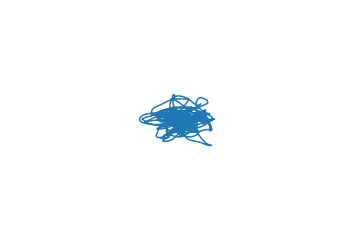

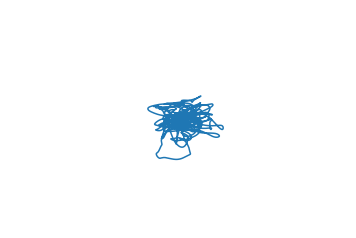

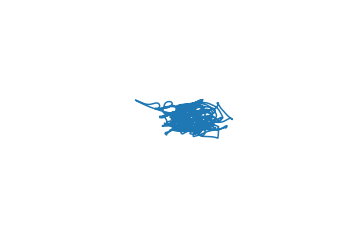

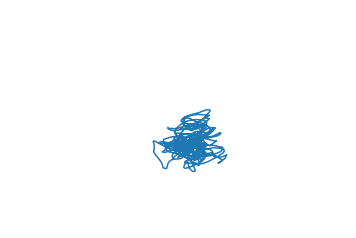

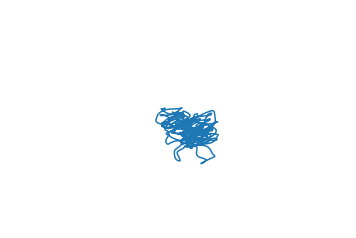

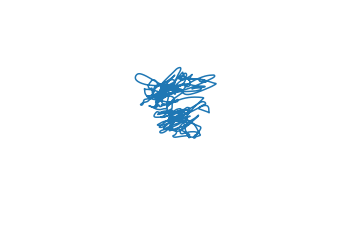

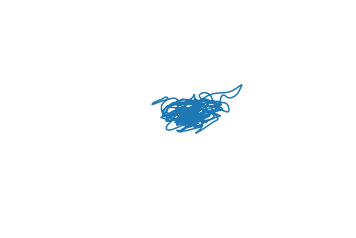

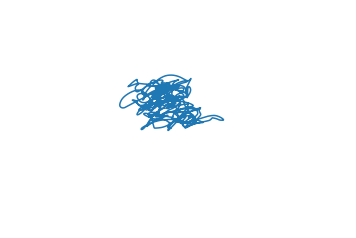

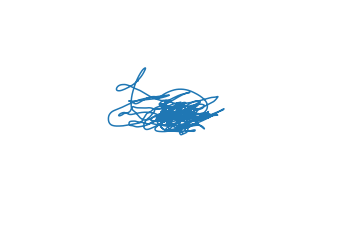

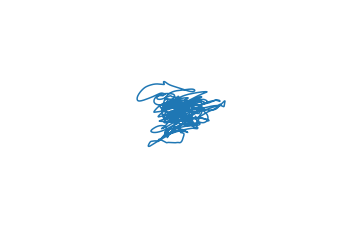

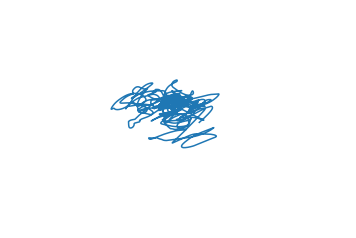

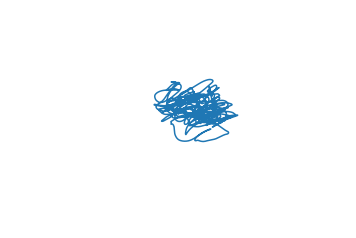

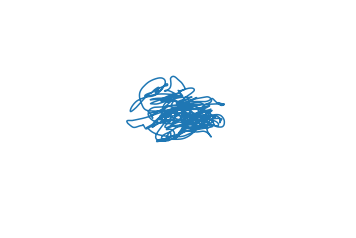

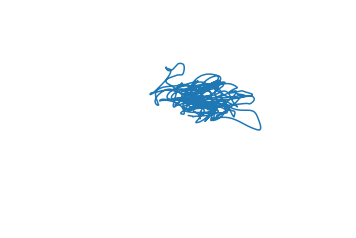

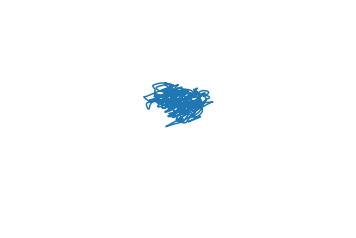

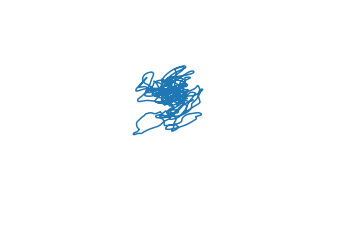

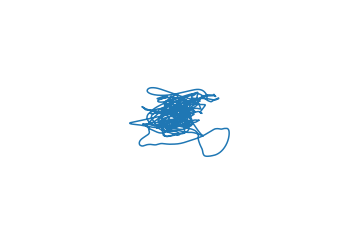

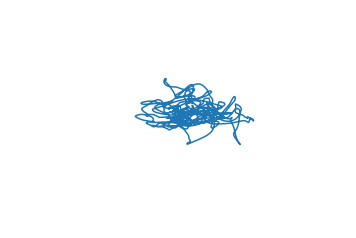

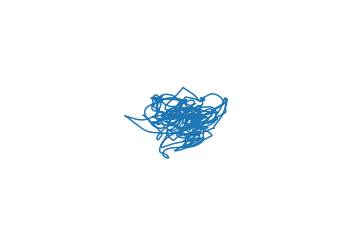

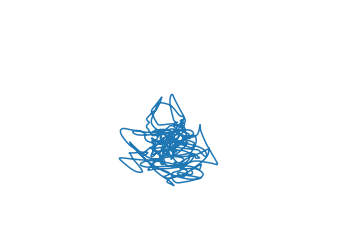

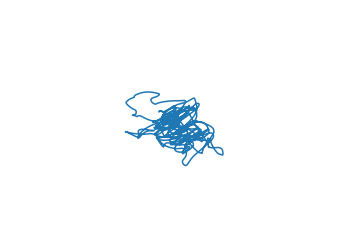

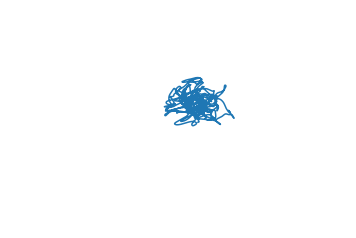

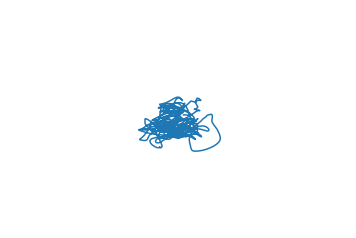

In [126]:
#矩形面積用
Subject_list = [1,2,3,4,5,6,7]
Output_dir = {1:"pre1", 2:"pre2", 3:"pgm1", 4:"pgm2", 5:"pgm3", 6:"pgm4", 7:"pgm5", 8:"post1", 9:"post2"}
folderPath = "Results/Lowpass filtered/set zero/Sub"
for sub in Subject_list:
    filePath = folderPath + str(sub) + "/"
    files = os.listdir(filePath)
    for num,file in enumerate(files):
        dat = pd.read_csv(filePath + file)
        dat.set_index("Unnamed: 0", inplace = True)
        plt.figure()
        plt.xlim(-0.06,0.06)
        plt.ylim(-0.06,0.06)
        plt.plot(dat["L Px(Lowpass)[m]"], dat["L Py(Lowpass)[m]"])
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
        plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
        plt.savefig("Results/Figure/For rect area/Sub" + str(sub) + "/" + "s" + str(sub) + Output_dir[num + 1] + ".jpg")

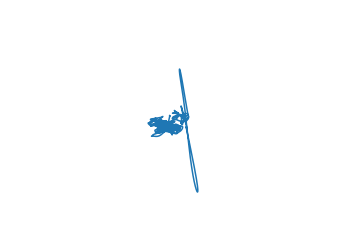

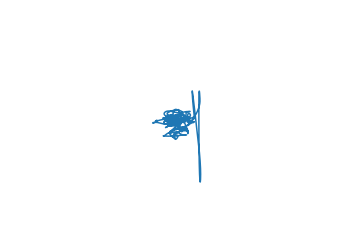

In [20]:
#Sub3_pgm3,pgm5,矩形面積用
Output_dir = {1:"pgm3", 2:"pgm5"}
folderPath = "Results/Lowpass filtered/set zero/Sub"
filePath = folderPath + str(3) + "/"
files = os.listdir(folderPath + str(3))
files = [files[4], files[6]]
for num,file in enumerate(files):
    dat = pd.read_csv(filePath + file)
    dat.set_index("Unnamed: 0", inplace = True)
    plt.figure()
#     plt.locator_params(axis='y',nbins=10)#y軸，6個以内．
    plt.xlim(-0.15,0.15)
    plt.ylim(-0.15,0.15)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
    plt.plot(dat["L Px(Lowpass)[m]"], dat["L Py(Lowpass)[m]"])
    plt.savefig("Results/Figure/For rect area/Sub3/s3" + Output_dir[num + 1] + ".jpg")

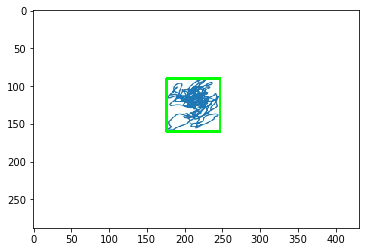

In [136]:
#矩形面積抽出
Subject_list = [1,2,3,4,5,6,7]
Output_dir = {1:"pre1", 2:"pre2", 3:"pgm1", 4:"pgm2", 5:"pgm3", 6:"pgm4", 7:"pgm5", 8:"post1", 9:"post2"}
for sub in Subject_list:
    files = os.listdir("Results/Figure/For rect area/Sub" + str(sub) + "/")
    width_list = []
    height_list = []
    area_list = []
    boundaryLength = []
    for num, file in enumerate(files):
        in_img1 = cv2.imread("Results/Figure/For rect area/Sub" + str(sub) + "/" + file) 
        #グレイ画像へ変換
        gray_img = cv2.cvtColor(in_img1, cv2.COLOR_BGR2GRAY)
        #２値化
        ret,thresh = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

        #輪郭抽出
        image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        #外接矩形
        cnt = contours[0]
        x,y,w,h = cv2.boundingRect(cnt)
        img = cv2.rectangle(in_img1,(x,y),(x+w,y+h),(0,255,0),2)
        
        #グラフの縮尺に直す
        w_meter = (0.12/336) * w
        h_meter = (0.12/218) * h
        width_list.append(w_meter)
        height_list.append(h_meter)
        area_list.append(w_meter * h_meter)
        boundaryLength.append(2 * w_meter + 2 * h_meter)
        
        
# #外接矩形（回転を許す場合）
# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# im = cv2.drawContours(in_img2,[box],0,(0,0,255),2)

#外接円
# (x,y),radius = cv2.minEnclosingCircle(cnt)
# center = (int(x),int(y))
# radius = int(radius)
# img = cv2.circle(in_img3,center,radius,(255,0,0),2)

        #OpenCVがBGRなのでRGBに変換
        disp_out_img1 = cv2.cvtColor(in_img1, cv2.COLOR_BGR2RGB)

        #画像表示
        # plt.subplot(131)
        plt.imshow(disp_out_img1)
        plt.savefig("Results/Figure/rect/Sub" + str(sub) + "/Sub" + str(sub) + "_" + Output_dir[num + 1] + ".jpg")
    output_df = pd.DataFrame({"Width[m]":width_list,
                             "Height[m]":height_list,
                             "Boundary Length[m]":boundaryLength,
                             "Area[m2]":area_list},
                            columns = ["Width[m]", "Height[m]", "Boundary Length[m]", "Area[m2]"], index = files)
    output_df.to_csv("Results/Area_boundaryLength/Sub" + str(sub) + ".csv")

w: 50
h: 92
w_meter: 0.044642857142857144
h_meter: 0.12660550458715594
Area: 0.005652031454783747
BoundaryLength: 0.3424967234600262


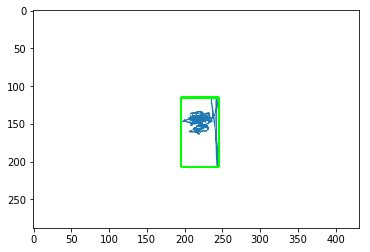

In [22]:
#Sub3 pgm3,pgm5用
in_img1 = cv2.imread("Results/Figure/For rect area/Sub3/s3pgm5.jpg") 
#グレイ画像へ変換
gray_img = cv2.cvtColor(in_img1, cv2.COLOR_BGR2GRAY)
#２値化
ret,thresh = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#輪郭抽出
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#外接矩形
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(in_img1,(x,y),(x+w,y+h),(0,255,0),2)
        
#グラフの縮尺に直す
w_meter = (0.3/336) * w
h_meter = (0.3/218) * h
print("w:", w)
print("h:", h)
print("w_meter:", w_meter)
print("h_meter:",h_meter)
print("Area:",w_meter * h_meter)
print("BoundaryLength:",2 * w_meter + 2 * h_meter)
        
        
# #外接矩形（回転を許す場合）
# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# im = cv2.drawContours(in_img2,[box],0,(0,0,255),2)

#外接円
# (x,y),radius = cv2.minEnclosingCircle(cnt)
# center = (int(x),int(y))
# radius = int(radius)
# img = cv2.circle(in_img3,center,radius,(255,0,0),2)

#OpenCVがBGRなのでRGBに変換
disp_out_img1 = cv2.cvtColor(in_img1, cv2.COLOR_BGR2RGB)

#画像表示
# plt.subplot(131)
plt.imshow(disp_out_img1)
plt.savefig("Results/Figure/rect/Sub3/Sub3_pgm5.jpg")

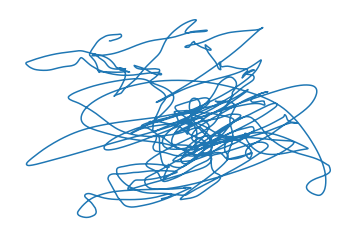

In [23]:
test = pd.read_csv("Results/Lowpass filtered/set zero/Sub1/Filtered_190129_110016_s1_pgm1.csv")
test.set_index("Unnamed: 0", inplace = True)
plt.plot(test["L Px(Lowpass)[m]"], test["L Py(Lowpass)[m]"])
ax = plt.gca()
# ax.spines['bottom'].set_position(('data',0))
# ax.yaxis.set_ticks_position('left')
# ax.spines['left'].set_position(('data',0))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.savefig("test.jpg")

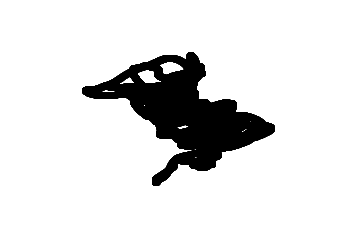

In [29]:
test = pd.read_csv("Results/Lowpass filtered/set zero/Sub1/Filtered_190129_110129_s1_pgm2.csv")
test.set_index("Unnamed: 0", inplace = True)
plt.plot(test["L Px(Lowpass)[m]"], test["L Py(Lowpass)[m]"], color="black")
ax = plt.gca()
# ax.spines['bottom'].set_position(('data',0))
# ax.yaxis.set_ticks_position('left')
# ax.spines['left'].set_position(('data',0))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.savefig("test2.jpg")

In [32]:
#矩形面積を出してみる
img = cv2.imread('test.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
imgEdge,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print (M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print("Cx:",cx)
print("Cy:",cy)
area = cv2.contourArea(cnt)
print("Area:",area)
perimeter = cv2.arcLength(cnt,True)
print("Perimeter:",perimeter)

{'m00': 2.0, 'm10': 258.0, 'm01': 484.0, 'm20': 33282.33333333333, 'm11': 62436.0, 'm02': 117128.33333333333, 'm30': 4293507.0, 'm21': 8054324.666666667, 'm12': 15109555.0, 'm03': 28345218.0, 'mu20': 0.3333333333284827, 'mu11': 0.0, 'mu02': 0.3333333333284827, 'mu30': 1.862645149230957e-09, 'mu21': 1.4842953532934189e-09, 'mu12': 6.257323548197746e-10, 'mu03': 3.725290298461914e-09, 'nu20': 0.08333333333212067, 'nu11': 0.0, 'nu02': 0.08333333333212067, 'nu30': 3.2927225399135965e-10, 'nu21': 2.623888273993647e-10, 'nu12': 1.1061489782522237e-10, 'nu03': 6.585445079827193e-10}
Cx: 129
Cy: 242
Area: 2.0
Perimeter: 5.656854152679443


In [3]:
#矩形面積を出してみる
img = cv2.imread('test4.jpg',cv2.IMREAD_COLOR)

# グレースケール画像へ変換
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # 2値化
retval, bw = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

  # 輪郭を抽出
  #   contours : [領域][Point No][0][x=0, y=1]
  #   cv2.CHAIN_APPROX_NONE: 中間点も保持する
  #   cv2.CHAIN_APPROX_SIMPLE: 中間点は保持しない
imgEdge,contours,hierarchy = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# cv2.imshow("color",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

cnt = contours[0]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)

print (M)
print("Cx:",cx)
print("Cy:",cy)
print("Area:",area)
print("Perimeter:",perimeter)

x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2.imwrite('test3.jpg', img[y:y + h, x:x + w])

{'m00': 2.0, 'm10': 1798.0, 'm01': 6212.0, 'm20': 1616402.3333333333, 'm11': 5584588.0, 'm02': 19294472.333333332, 'm30': 1453146297.0, 'm21': 5020545647.333333, 'm12': 17345730627.666668, 'm03': 59928633138.0, 'mu20': 0.3333333332557231, 'mu11': 0.0, 'mu02': 0.3333333320915699, 'mu30': 2.384185791015625e-07, 'mu21': -7.683411240577698e-08, 'mu12': 2.387911081314087e-06, 'mu03': 1.52587890625e-05, 'nu20': 0.08333333331393078, 'nu11': 0.0, 'nu02': 0.08333333302289248, 'nu30': 4.2146848510894035e-08, 'nu21': -1.3582480477143585e-08, 'nu12': 4.2212702961692306e-07, 'nu03': 2.6973983046972182e-06}
Cx: 899
Cy: 3106
Area: 2.0
Perimeter: 5.656854152679443


True

C:\Users\Yusuke\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


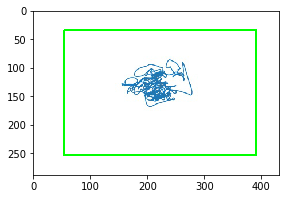

In [123]:
#画像読込
in_img1 = cv2.imread("Results/Figure/For rect area/Sub3/s3pre1.jpg") 
#グレイ画像へ変換
gray_img = cv2.cvtColor(in_img1, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(gray_img)
#２値化
ret,thresh = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#↑いけた，なんで？cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU,THRESH_BINARY_INVは8で，THRESH_OTSUは1，255～9？
# ret,thresh = cv2.threshold(gray_img,220,1,0)
#↑だめだった，なんで？
#輪郭抽出
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#外接矩形
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(in_img1,(x,y),(x+w,y+h),(0,255,0),2)

# #外接矩形（回転を許す場合）
# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# im = cv2.drawContours(in_img2,[box],0,(0,0,255),2)

#外接円
# (x,y),radius = cv2.minEnclosingCircle(cnt)
# center = (int(x),int(y))
# radius = int(radius)
# img = cv2.circle(in_img3,center,radius,(255,0,0),2)

#OpenCVがBGRなのでRGBに変換
disp_out_img1 = cv2.cvtColor(in_img1, cv2.COLOR_BGR2RGB)

#画像表示
# plt.subplot(131)
plt.imshow(disp_out_img1)

In [124]:
print(x,y,w,h)
print(thresh)
print(contours[0])
print(cv2.THRESH_BINARY_INV)
print(cv2.THRESH_OTSU)
print(cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(cv2.boundingRect(cnt))
retval = cv2.arcLength(cv2.boundingRect(cnt), True)

54 35 336 218
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[[ 54  35]]

 [[ 54 252]]

 [[389 252]]

 [[389  35]]]
1
8
9
(54, 35, 336, 218)


error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\shapedescr.cpp:237: error: (-215:Assertion failed) count >= 0 && (depth == 5 || depth == 4) in function 'cv::arcLength'


In [26]:
Subject_list = ["Sub1", "Sub2", "Sub3", "Sub4", "Sub5", "Sub6", "Sub7"]
output_index = ["pre1", "pre2", "pgm1", "pgm2", "pgm3", "pgm4", "pgm5", "post1", "post2"]
test = pd.read_csv("Results0205/Sub1.csv")
test.set_index("Unnamed: 0", inplace = True)
test_columns = list(test.columns)
for column in test_columns:
    result_list = []
    for sub in Subject_list:
        dat_df = pd.read_csv("Results0205/" + sub + ".csv")
        result_list.append(dat_df[column])
    output_df = pd.DataFrame({"index":output_index,
                            "Sub1":result_list[0],
                             "Sub2":result_list[1],
                             "Sub3":result_list[2],
                             "Sub4":result_list[3],
                             "Sub5":result_list[4],
                             "Sub6":result_list[5],
                             "Sub7":result_list[6]},
                            columns = ["index", "Sub1", "Sub2", "Sub3", "Sub4", "Sub5", "Sub6", "Sub7"])
    output_df.set_index("index", inplace = True)
    output_df.to_csv("Results0205/" + column + ".csv")

In [15]:
output_index

['pre1', 'pre2', 'pgm1', 'pgm2', 'pgm3', 'pgm4', 'pgm5', 'post1', 'post2']